In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
col_val = ['O3', 'SO2', 'H2S', 'IAQ', 'CO', 'EtOH', 'RESP', 'NO2']

In [4]:
control_data = np.genfromtxt('data/control2.csv', delimiter=',')
control = pd.DataFrame(control_data, columns=col_val)

In [5]:
control['target'] = 'control'

In [6]:
lux_soap_data = np.genfromtxt('data/lux_soap.csv', delimiter=',')
lux_soap = pd.DataFrame(lux_soap_data, columns=col_val)

In [7]:
lux_soap['target'] = 'lux_soap'

In [8]:
df = pd.concat([control, lux_soap])
df

,O3,SO2,H2S,IAQ,CO,EtOH,RESP,NO2,target
0,1093.0,2677.0,2649.0,1504.0,3758.0,3519.0,2660.0,2668.0,control
1,1088.0,2674.0,2649.0,1437.0,3632.0,3496.0,2670.0,2668.0,control
2,1096.0,2673.0,2649.0,1401.0,3591.0,3483.0,2671.0,2668.0,control
3,1091.0,2680.0,2651.0,1601.0,3781.0,3510.0,2664.0,2668.0,control
4,1037.0,2681.0,2649.0,1435.0,3666.0,3506.0,2661.0,2668.0,control
...,...,...,...,...,...,...,...,...,...
253,1268.0,2685.0,340.0,1450.0,2662.0,3481.0,2661.0,2668.0,lux_soap
254,1297.0,2679.0,292.0,1552.0,2750.0,3493.0,2667.0,2668.0,lux_soap
255,1314.0,2681.0,244.0,1544.0,2743.0,3431.0,2665.0,2666.0,lux_soap
256,1302.0,2684.0,195.0,1507.0,2685.0,3477.0,2671.0,2668.0,lux_soap


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
log_mod1 = LogisticRegression()

In [19]:
log_mod1.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = log_mod1.predict(X_test)

In [21]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       1.00      1.00      1.00        74
    lux_soap       1.00      1.00      1.00        78

    accuracy                           1.00       152
   macro avg       1.00      1.00      1.00       152
weighted avg       1.00      1.00      1.00       152

[[74  0]
 [ 0 78]]


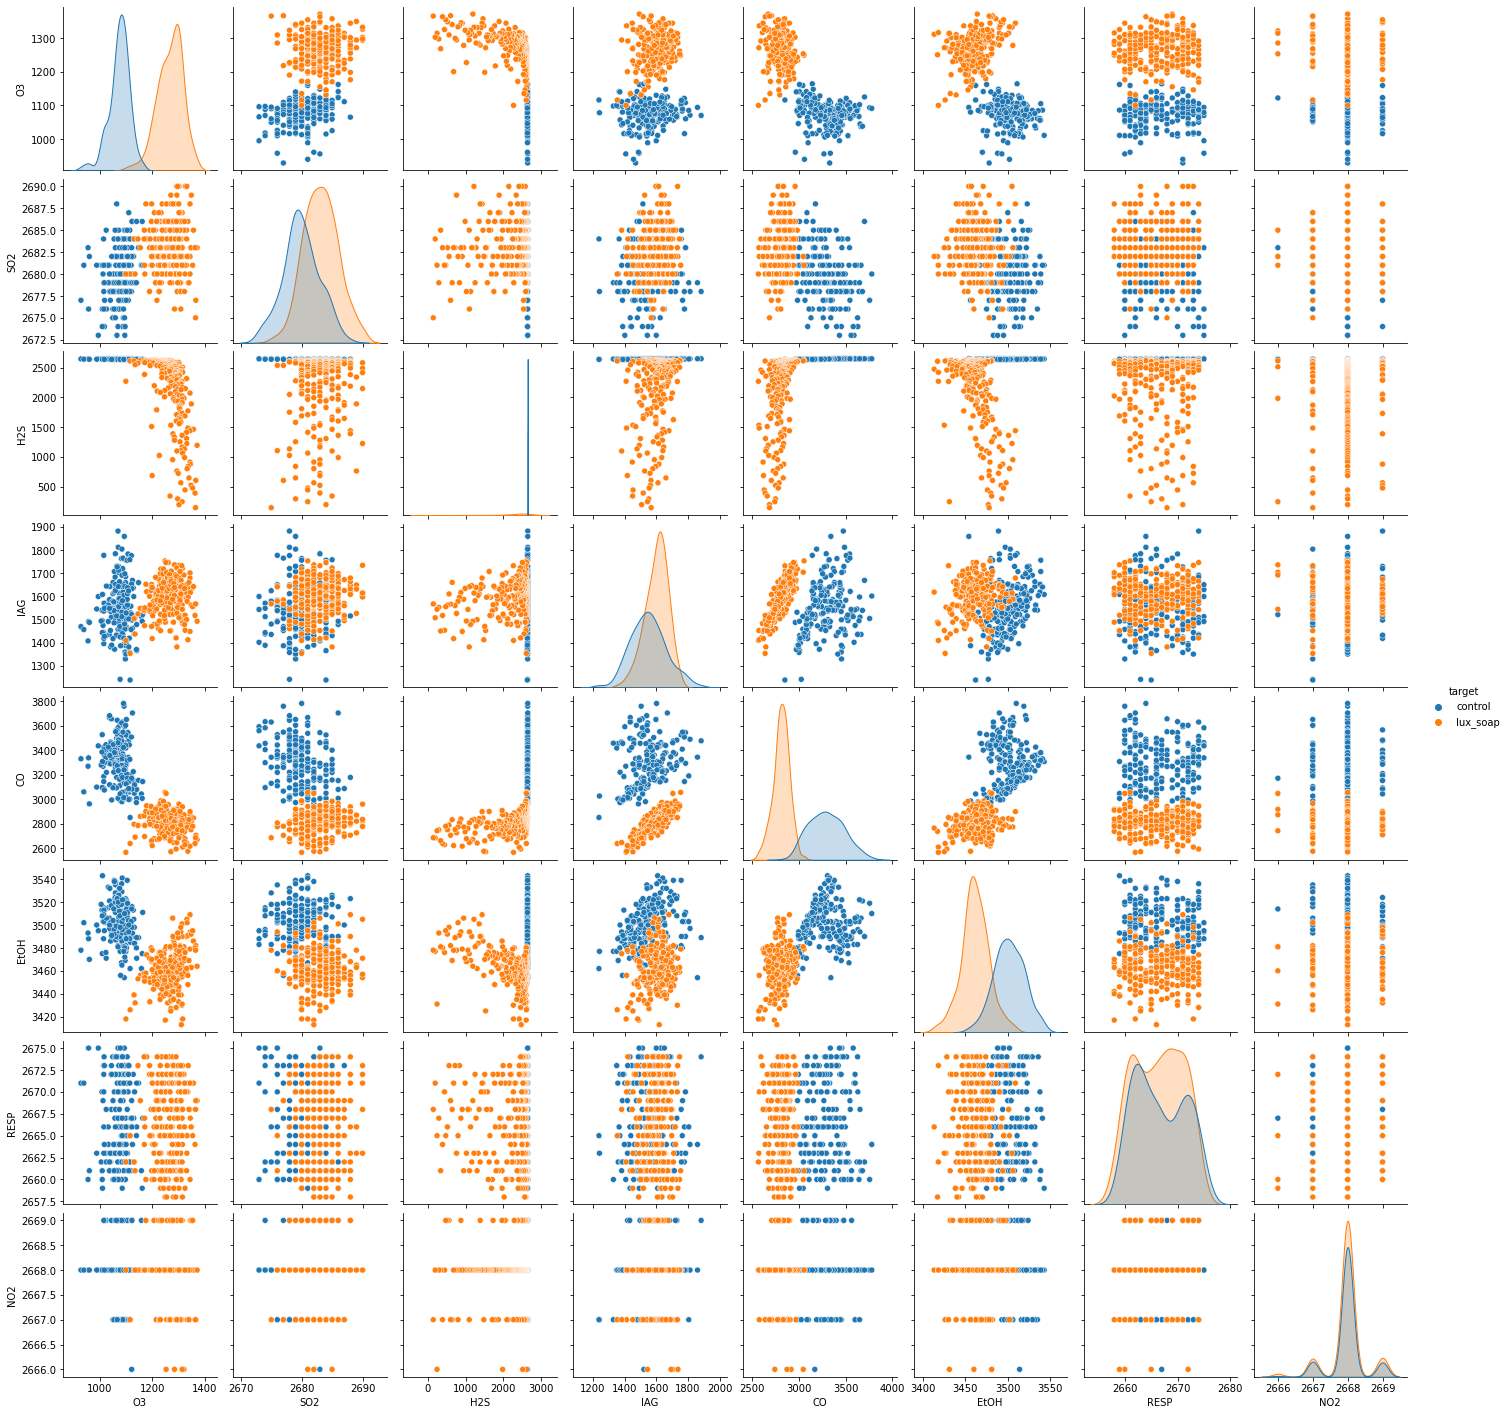

In [50]:
sns.pairplot(df, hue='target')

In [22]:
log_mod1.predict([[2607,2666,2670,1180,2777,2848,2666,2668]])

array(['lux_soap'], dtype=object)

In [23]:
log_mod2 = LogisticRegression()

In [25]:
control_data = np.genfromtxt('data/control1.csv', delimiter=',')
control = pd.DataFrame(control_data, columns=col_val)
lux_soap_data = np.genfromtxt('data/lux_soap2.csv', delimiter=',')
lux_soap = pd.DataFrame(lux_soap_data, columns=col_val)

In [26]:
control['target'] = 'control'
lux_soap['target'] = 'lux_soap'

In [36]:
df = pd.concat([control, lux_soap])
df

,O3,SO2,H2S,IAQ,CO,EtOH,RESP,NO2,target
0,2686.0,2690.0,2670.0,5.0,2946.0,2795.0,2704.0,2668.0,control
1,2649.0,2684.0,2668.0,4.0,2774.0,2760.0,2698.0,2668.0,control
2,2668.0,2687.0,2670.0,5.0,2875.0,2775.0,2694.0,2668.0,control
3,2573.0,2687.0,2669.0,5.0,2739.0,2777.0,2693.0,2668.0,control
4,2676.0,2686.0,2670.0,4.0,2788.0,2774.0,2708.0,2668.0,control
...,...,...,...,...,...,...,...,...,...
204,2586.0,2673.0,2670.0,4.0,2816.0,2851.0,2663.0,2668.0,lux_soap
205,2548.0,2669.0,2669.0,5.0,2803.0,2843.0,2674.0,2669.0,lux_soap
206,2572.0,2675.0,2670.0,5.0,2786.0,2841.0,2676.0,2668.0,lux_soap
207,2402.0,2672.0,2669.0,4.0,2620.0,2835.0,2664.0,2668.0,lux_soap


In [28]:
X = df.drop('target', axis=1)
y = df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
log_mod2.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = log_mod2.predict(X_test)

In [32]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       1.00      1.00      1.00        72
    lux_soap       1.00      1.00      1.00        64

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

[[72  0]
 [ 0 64]]


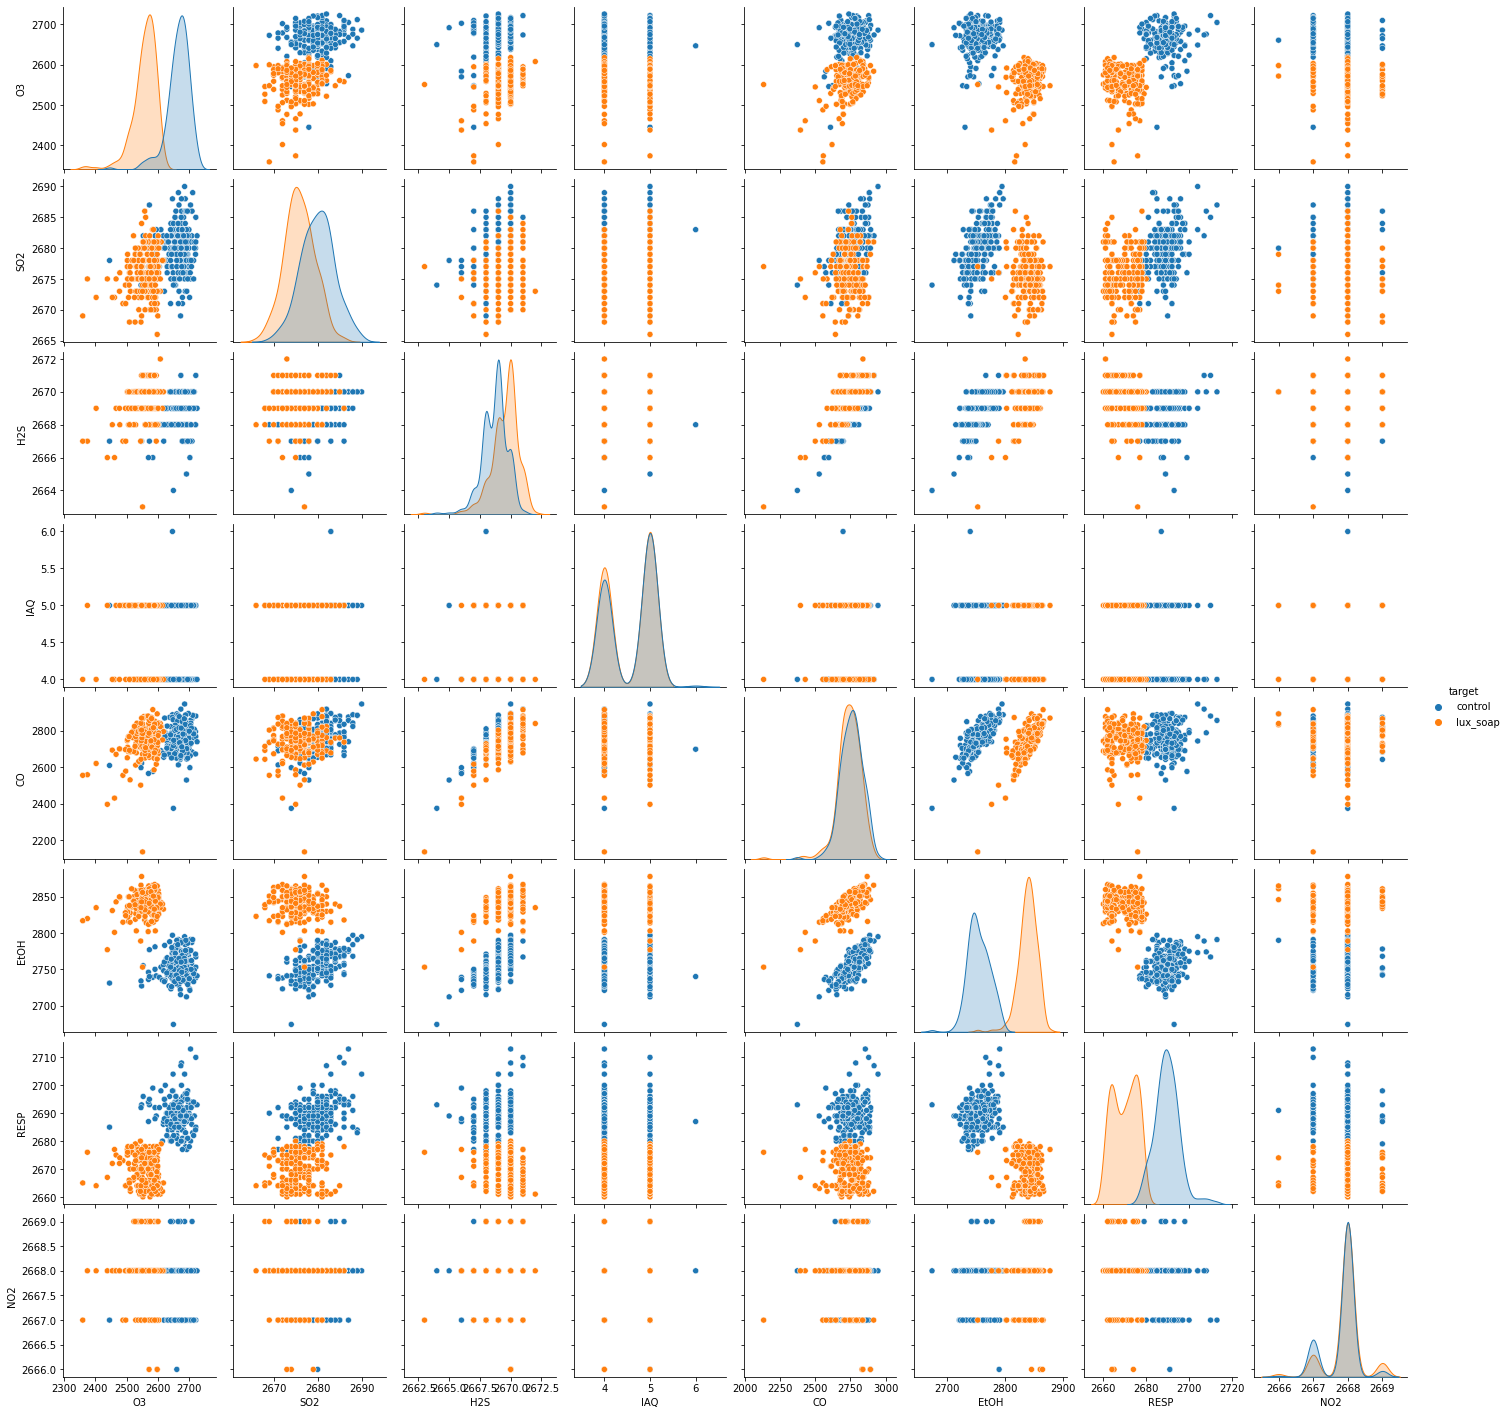

In [34]:
sns.pairplot(df, hue='target')

In [35]:
log_mod2.predict([[2614,2665,2671,1299,2733,2827,2668,2668]])

array(['lux_soap'], dtype=object)

In [37]:
log_mod1.predict([[2614,2665,2671,1299,2733,2827,2668,2668]])

array(['lux_soap'], dtype=object)

In [50]:
control_data = np.genfromtxt('data/control3.csv', delimiter=',')
control = pd.DataFrame(control_data, columns=col_val)
lux_soap_data = np.genfromtxt('data/lux_soap2.csv', delimiter=',')
lux_soap = pd.DataFrame(lux_soap_data, columns=col_val)

In [51]:
control['target'] = 'control'
lux_soap['target'] = 'lux_soap'

In [52]:
df = pd.concat([control, lux_soap])

In [53]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
log_mod3 = LogisticRegression()

In [57]:
log_mod3.fit(X_train, y_train)
y_pred = log_mod3.predict(X_test)

In [58]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       1.00      1.00      1.00        58
    lux_soap       1.00      1.00      1.00        64

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

[[58  0]
 [ 0 64]]


In [56]:
log_mod3.predict([[2614,2665,2671,1299,2733,2827,2668,2668]])

array(['control'], dtype=object)

In [20]:
control_data = np.genfromtxt('data/control3.csv', delimiter=',')
control = pd.DataFrame(control_data, columns=col_val)
shokubutsu_data = np.genfromtxt('data/shokubutsu.csv', delimiter=',')
shokubutsu = pd.DataFrame(shokubutsu_data, columns=col_val)

In [24]:
control = control[0:200]
shokubutsu = shokubutsu[0:200]

In [25]:
control['target'] = 'control'
shokubutsu['target'] = 'shokubutsu'

<ipython-input-25-75dd58aa2387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['target'] = 'control'
<ipython-input-25-75dd58aa2387>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shokubutsu['target'] = 'shokubutsu'


In [26]:
df = pd.concat([control, shokubutsu])

In [27]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

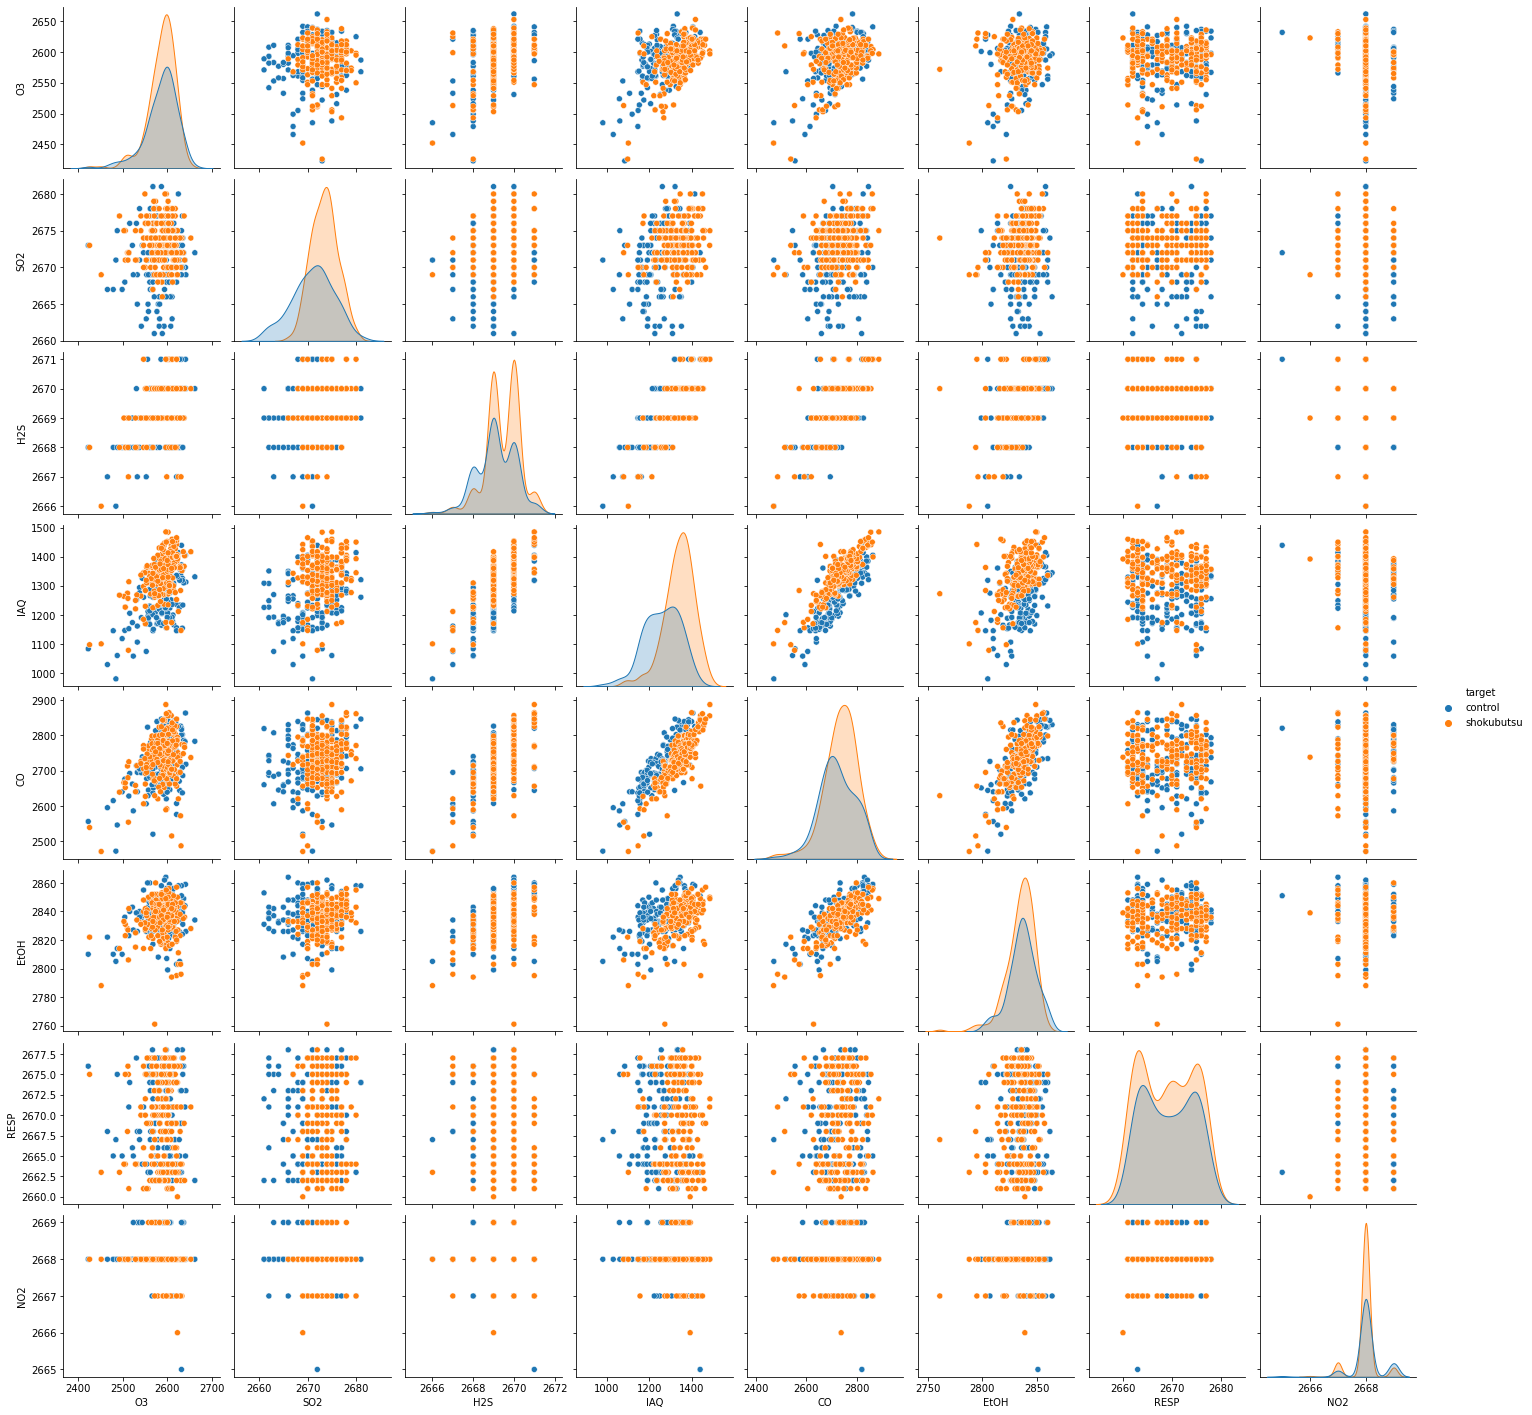

In [12]:
sns.pairplot(df, hue='target')

In [28]:
log_mod = LogisticRegression(max_iter=1000)
log_mod.fit(X_train, y_train)
y_pred = log_mod.predict(X_test)

In [29]:
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     control       0.90      0.76      0.82        58
  shokubutsu       0.80      0.92      0.85        61

    accuracy                           0.84       119
   macro avg       0.85      0.84      0.84       119
weighted avg       0.85      0.84      0.84       119

[[44 14]
 [ 5 56]]


In [30]:
log_mod.predict([[2493,2677,2668,1268,2639,2814,2663,2668]])

array(['shokubutsu'], dtype=object)